<a href="https://colab.research.google.com/github/michellesuminpark/datascience/blob/master/admission_rate_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[LS22] UC Berkeley Admission Rate**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR ONLY: SPLIT 1 (1.2, 2.1, 2.2, 3.1, 3.2)

## Part 1: Observation and Instrumentation

A university's admission is related to the different aspects of the society, and often becomes a good reflection on societal's values and dynamic. For this part of the assignment, we will be working with a segment of **UC Berkeley's 1973 graduate admission data** to further explore how gender (recorded binary: Female and Male during 1973) plays a role in admission.

First, let's run the data! Fill in the code to read *```berkeley.csv```* below to call the data.

In [ ]:
# Sync Google Drive to get CSV file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load UC Berkeley 1973 Graduate Admission Rate Dataset
berkeley = ...
berkeley.head(15)

AttributeError: 'ellipsis' object has no attribute 'head'

In [ ]:
# Instructor_only/ Solution

berkeley = pd.read_csv('/content/drive/MyDrive/SSS/berkeley.csv')
berkeley.head(15)

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


<!-- BEGIN QUESTION -->
**Question 1.1 (short answer):** Just at first glance, what can you observe from the data? What assumptions can you make based on this data and your prior knowledge of the background on admission or your classroom experience at UC Berkeley?

***If you do not have any prior knowledge, explain your assumptions.*

_Your Answer Here_

In [ ]:
# Instructor_Only / Solution
# Student's answer may vary. Example response below.

# At first glance, there seem to be more male admitted to the UC Berkeley graduate programs. I assume that male are more likely to be admitted, as I observe male as a majority in the classrooms.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->
**Question 1.2 (short answer):** Do you believe in your senses regarding this topic? Why or why not? Provide a credence level (i.e. "I am 70% confident that..") for your assumptions above.

_Your Answer Here_

In [ ]:
# Learning goal:
# 3.2) Calibration of Credence Levels
## Appreciate that one can improve on the calibration of their credence levels, and one should strive to reach an accurate calibration.

In [ ]:
# Instructor_Only / Solution
# Student's answer may vary. Example response below.

# I am 45% confident about my claim above. don't particularly believe in my senses because I might be exposed to only certain environment (DS class) and therefore have a skewed view of gender ratio in class/ admission.

<!-- End QUESTION -->

Our senses can be limiting or not possible in some aspect. Now, let's utilize ```pandas```, ```numpy```, and ```matplotlib```


 instruments to explore this dataset!

In [ ]:
# Data Collection and Trustworthiness:
# Explore the origins of the data (e.g., Berkeley dataset), its collection process, and its validity.
# Discuss factors that could affect data collection and responses.
# Consider watching an associated video to deepen understanding.


In [ ]:
# Calculate the total number of females and males
total_f = (berkeley["Gender"] == "F").sum()
total_m = (berkeley["Gender"] == "M").sum()

# Calculate the number of accepted females and males
accepted_f = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "F")].shape[0]
accepted_m = berkeley[(berkeley["Admission"] == "Accepted") & (berkeley["Gender"] == "M")].shape[0]

# Calculate the acceptance rates for females and males
acceptance_rate_f = (accepted_f / total_f) * 100
acceptance_rate_m = (accepted_m / total_m) * 100

# Print the results
print(f"1973's Berkeley admission rate seems to be: female: {acceptance_rate_f}% and male: {acceptance_rate_m}%")

1973's Berkeley admission rate seems to be: female: 34.57532978477204% and male: 44.27860696517413%


In [ ]:
# Create a pivot table to get the totals for Accepted and Rejected admissions per Gender
admission_f_m = berkeley
admission_f_m = pd.pivot_table(admission_f_m, index = "Gender", columns = "Admission", aggfunc="size")
admission_f_m = admission_f_m.reset_index()
admission_f_m["Gender"] = ["Female", "Male"]
admission_f_m

Admission,Gender,Accepted,Rejected
0,Female,1494,2827
1,Male,3738,4704


In [ ]:
# Calculate acceptance rates
admission_f_m["Acceptance Rate"] = admission_f_m["Accepted"] / (admission_f_m["Accepted"] + admission_f_m["Rejected"])

# The DataFrame admission_f_m now includes the acceptance rates
admission_f_m


Admission,Gender,Accepted,Rejected,Acceptance Rate
0,Female,1494,2827,0.345753
1,Male,3738,4704,0.442786


Text(0, 0.5, 'Gender')

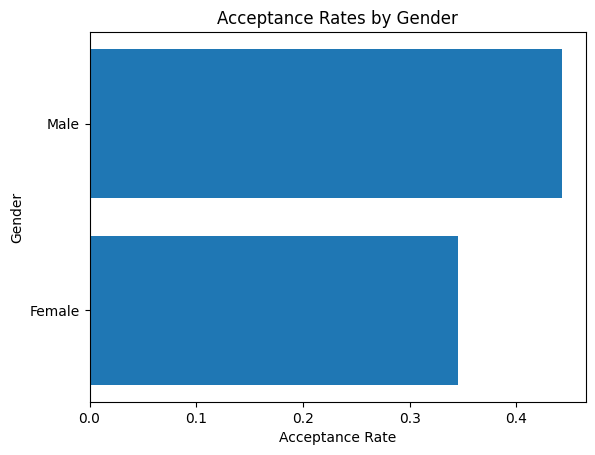

In [ ]:
plt.barh(admission_f_m["Gender"], admission_f_m["Acceptance Rate"])
plt.title("Acceptance Rates by Gender")
plt.xlabel("Acceptance Rate")
plt.ylabel("Gender")

## Takeaway
In this lab, we aim to prepare students for utilizing data science and decision making skillsets with the UC Berkeley 1973 Graduate Admission
Rate dataset. The objectives of this lab are as follows:


- **Senses and Instrumentation**:
  - Learn how science uses senses and instruments for observation.
  - Trust instruments for precise observations where direct senses can't reach.
  - Understand instrument validation and the extension of objective reality through their use.

- **Probabilistic Reasoning**:
  - Understand the importance of confidence in judgments and decision-making under uncertainty.
  - Recognize inherent uncertainties in claims and the value of scientific expressions of uncertainty.

- **Confirmation Bias**:
  - Be aware of the tendency to favor existing beliefs, even against evidence.
  - Learn about selective exposure and biased assimilation, and how to mitigate confirmation bias by seeking counter-evidence.

- **When Is Science Suspect**:
  - Acknowledge the misuse of science in reinforcing power structures.
  - Be cautious of science in studies involving human groups and aware of social dynamics affecting scientific assessments.

# INSTRUCTOR ONLY: SPLIT 2 (9.1, 10.1)

## Part 2 Exploratory Data Analysis (EDA) and Initial Observations


EDA is the process of analyzing/summarizing data to extract valuable insights and patterns that can help guide further analysis.

EDA is usually performed at the beginning of a data science project and helps to guide the direction of the analysis. EDA allows us to gain an understanding of the data, identify any patterns or anomalies, and detect any potential issues that may affect the analysis.

In the following problems, we will perform EDA on our admission rates dataset.

**Question #**: Load the dataset...

In [ ]:
#SOLUTION (note that the path to the dataset will be local for students, so it'll be "path/berkeley.csv")
berkeley = pd.read_csv('/content/drive/MyDrive/SSS/berkeley.csv')
berkeley.head(10)

# YOUR CODE HERE

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,F,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,A,M,Accepted


**Question # (Short Answer)**: Before we dive straight into coding up visualiations, let's take a quick glance at the dataset. Scroll through it, and make some initial observations. What trends do you notice? (1-2 Sentences)

SOLUTION: We want students to make some initial observations. They may note the features in the dataset, disproportionate applications from males to females, etc.

*Your answer here*

In [ ]:
# Learning goal:
# 1.2) Shared reality and modelling
## Appreciate that one can improve on the calibration of their credence levels, and one should strive to reach an accurate calibration.

In [ ]:
# Instructor_Only / Solution
# Student's answer may vary. Example response below.

# ....

**Question # (Short Answer:** Given the observations you made, make some claim about the dataset. What is the credence level for your claim?

*Your answer here*

In [ ]:
# Learning goal:
# 3.2) Calibration of Credence Levels
## Appreciate that one can improve on the calibration of their credence levels, and one should strive to reach an accurate calibration.

In [ ]:
# Instructor_Only / Solution
# Student's answer may vary. Example response below.

# ....

**Question #**: Using the `berkeley` dataframe, create a dictionary of the following form:

{"M" : # of male applicants accepted, "F" : # of female applicants accepted}

In [ ]:
# SOLUTION
berkeley_accepted = berkeley[berkeley["Admission"] == "Accepted"]
m_accepted = berkeley_accepted[berkeley_accepted["Gender"] == "M"].shape[0]
f_accepted = berkeley_accepted[berkeley_accepted["Gender"] == "F"].shape[0]

dict_accepted = {"M" : m_accepted, "F" : f_accepted}
dict_accepted

{'M': 3738, 'F': 1494}

**Question #**: Utilizing the dictionary you made above, create a bar plot comparing the number of accepted students by gender.

<BarContainer object of 2 artists>

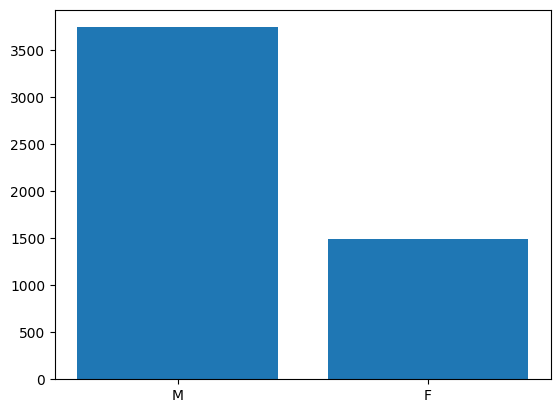

In [ ]:
# SOLUTION
plt.bar(x=dict_accepted.keys(), height=dict_accepted.values())

**Question #**:

# INSTRUCTOR ONLY: SPLIT 3 (11.2)

## Part 3: Understanding Visualizations and Further Implications